In [7]:
import pandas as pd

# Load the dataset and parse the date column
file_path = r"C:\Users\sai\OneDrive\Desktop\exchange_rate.csv"
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Display the first few rows of the dataset
df.head()


,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


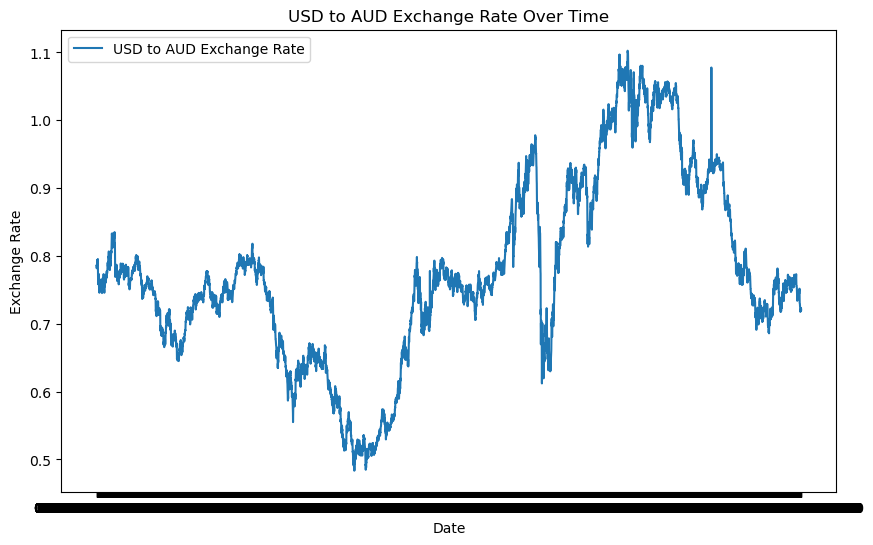

In [9]:
import matplotlib.pyplot as plt

# Plot the time series for USD to AUD exchange rate
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


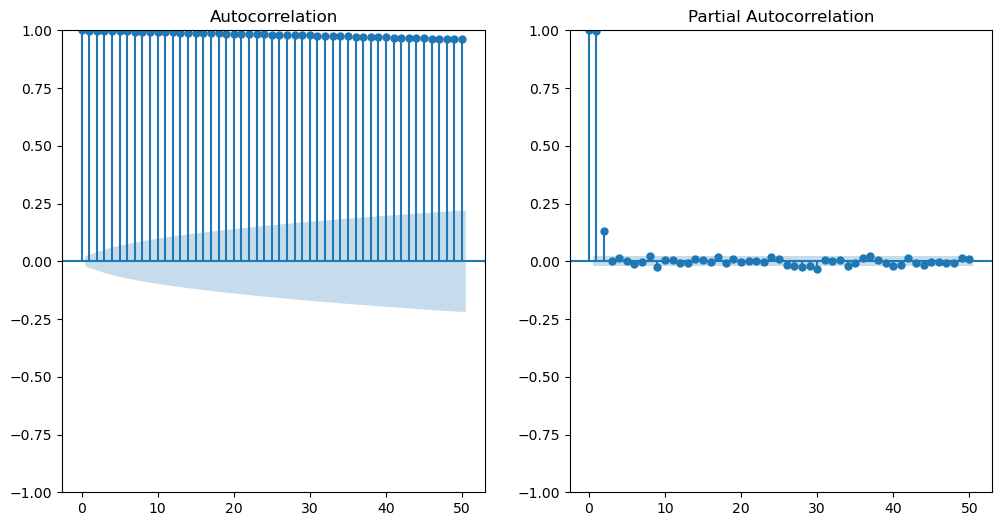

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to determine p and q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.show()


In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming p=1, d=1, q=1 from the ACF and PACF plots
arima_model = ARIMA(df['Ex_rate'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Summary of the ARIMA model
print(arima_model_fit.summary())


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 19 Aug 2024   AIC                         -56102.322
Time:                        20:22:23   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


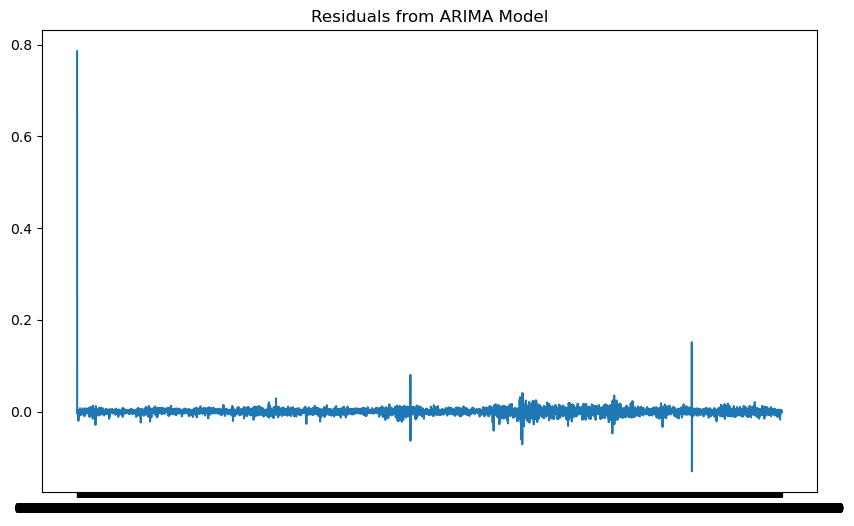

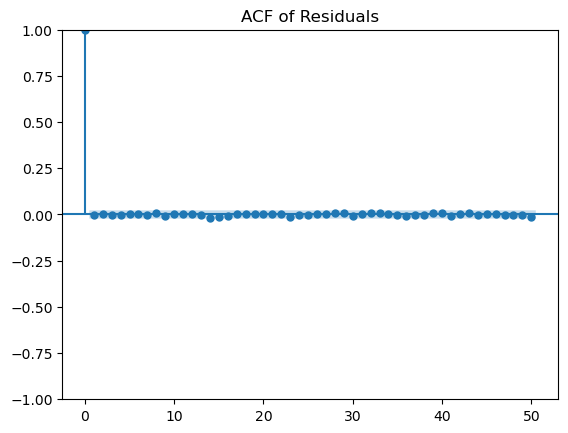

In [19]:
# Plot the residuals
residuals = arima_model_fit.resid

plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.show()

# Plot ACF of the residuals
plot_acf(residuals, lags=50)
plt.title('ACF of Residuals')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


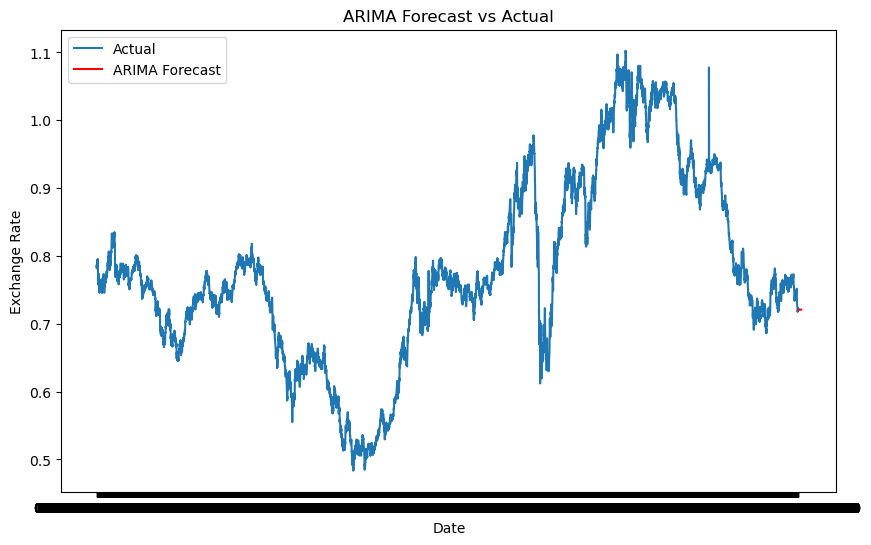

In [20]:
# Forecast the next 30 steps
forecast_arima = arima_model_fit.forecast(steps=30)

# Plot the forecasted values against the actual values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Choosing Holt-Winters model with additive trend and seasonality
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
holt_model_fit = holt_model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


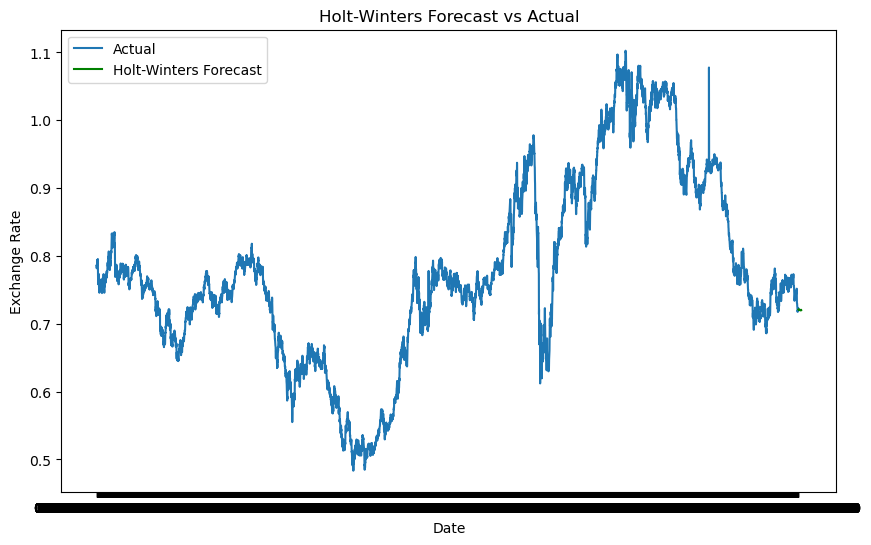

In [25]:
# Forecast the next 30 steps
forecast_holt = holt_model_fit.forecast(steps=30)

# Plot the forecasted values against the actual values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_holt.index, forecast_holt, label='Holt-Winters Forecast', color='green')
plt.title('Holt-Winters Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Let's assume we have actual future values to compare against for evaluation
# Replace the `actual_future_values` with your actual future values

# Compute error metrics for ARIMA
mae_arima = mean_absolute_error(df['Ex_rate'].iloc[-30:], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(df['Ex_rate'].iloc[-30:], forecast_arima))
mape_arima = np.mean(np.abs((df['Ex_rate'].iloc[-30:] - forecast_arima) / df['Ex_rate'].iloc[-30:])) * 100

# Compute error metrics for Holt-Winters
mae_holt = mean_absolute_error(df['Ex_rate'].iloc[-30:], forecast_holt)
rmse_holt = np.sqrt(mean_squared_error(df['Ex_rate'].iloc[-30:], forecast_holt))
mape_holt = np.mean(np.abs((df['Ex_rate'].iloc[-30:] - forecast_holt) / df['Ex_rate'].iloc[-30:])) * 100

print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
print(f"Holt-Winters - MAE: {mae_holt}, RMSE: {rmse_holt}, MAPE: {mape_holt}")


ARIMA - MAE: 0.012724006489305202, RMSE: 0.016982710912755217, MAPE: nan
Holt-Winters - MAE: 0.013019002498068229, RMSE: 0.017247277223000405, MAPE: nan
